  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

## **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/01**

## **Entrega 4**

---
### Previsão e Monitoramento da Dengue em São Paulo com Séries Temporais
---


**Grupo 8**

Aluno1 = 'Jéssica Clara da Silva Santos, 10414974'

### **Resumo**

Este projeto investiga o impacto da epidemia de dengue no monitoramento da saúde pública por meio da análise de séries temporais, utilizando dados reais extraídos via API do Info Dengue. A proposta visa desenvolver um produto analítico que possibilite a previsão de surtos e a identificação de tendências, sazonalidades e anomalias, subsidiando a tomada de decisão em saúde. A metodologia envolve a extração dos dados, seu pré-processamento, análise exploratória e modelagem utilizando métodos estatísticos (como ARIMA e SARIMA) e técnicas de aprendizado de máquina. O projeto é executável e reprodutível, contribuindo para ações preventivas e alinhando-se ao ODS 3 – Saúde e Bem-Estar.

### **Introdução**
A análise de séries temporais permite prever eventos futuros com base em dados históricos e é amplamente utilizada para monitorar a evolução de indicadores de saúde. Estudos de organizações como a Organização Mundial da Saúde (OMS) e o Ministério da Saúde demonstram que métodos como ARIMA e SARIMA são eficazes na previsão de surtos. Além disso, técnicas de aprendizado de máquina têm se mostrado úteis na detecção de anomalias e na melhoria da precisão dos modelos preditivos. A utilização de dados extraídos da API do Info Dengue garante a atualização e a originalidade das informações, essenciais para uma análise robusta que apoie a tomada de decisão em saúde pública.

Os dados utilizados neste projeto foram extraídos da API pública do InfoDengue ([https://info.dengue.mat.br/services/api](https://info.dengue.mat.br/services/api)), que fornece registros atualizados sobre a incidência de dengue em diversas regiões do Brasil. Esses dados foram organizados em formato de séries temporais semanais, abrangendo o período entre janeiro de 2020 e abril de 2025, permitindo a análise de tendências, sazonalidades e anomalias.

### **Referencial Teórico**

A modelagem de séries temporais utiliza dados ordenados no tempo para construir previsões. 
O modelo ARIMA (AutoRegressive Integrated Moving Average) é amplamente empregado nesse contexto 
e consiste na combinação de componentes autorregressivos, de média móvel e diferenciação. 
Segundo Bastos et al. (2019), esse modelo tem bom desempenho na predição de doenças infecciosas. 
Trabalhos correlacionados demonstram que, mesmo em dados com ruídos e atraso de notificação, 
o ARIMA pode fornecer previsões úteis para a gestão em saúde pública.

### **Diagrama de Solução**

O projeto segue as seguintes etapas:

1. **Coleta de Dados**: extração de dados via API do InfoDengue e armazenamento em formato estruturado (CSV).

2. **Pré-processamento**: limpeza dos dados, tratamento de valores ausentes e outliers, além da conversão para formato de séries temporais.

3. **Análise Exploratória**: visualizações com gráficos de linha, histogramas e boxplots para identificar padrões, tendências e sazonalidades.

4. **Modelagem e Previsão**: aplicação do modelo ARIMA para prever a incidência de dengue; outros modelos como SARIMA e algoritmos de aprendizado de máquina são considerados como potenciais extensões.

5. **Avaliação dos Resultados**: cálculo de métricas como MAE e RMSE, análise de resíduos e visualização dos resultados para facilitar a interpretação.

### **EDA e Pré-processamento dos dados**

#### 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

sns.set_theme(style='darkgrid')
pd.set_option('display.max_columns', None)

#### 2. Leitura e Pré-processamento dos Dados

Nesta etapa inicial, foi realizado a leitura do dataset fornecido pelo InfoDengue em formato CSV, com o tratamento adequado do campo de data. Em seguida, apliquei um filtro para considerar apenas os dados a partir de 2020, visando manter a consistência temporal de 5 anos proposta no projeto. Além disso, foi feito o ordenamento das datas para garantir integridade na análise temporal.

In [2]:
df = pd.read_csv("dengue_1-18.csv", parse_dates=['data_iniSE'])
df = df[df['data_iniSE'] >= '2020-01-01']
df = df.sort_values(by='data_iniSE').reset_index(drop=True)
df.head()

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,id,versao_modelo,tweet,Rt,pop,tempmin,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year
0,2020-01-05,202002,578.0,578,578.0,578,1.000000,4.689567,0,2,355030820200219589,2023-08-20,0.0,2.064354,12325232.0,21.142857,88.702436,1,1,1,74.679618,56.063189,24.229789,28.428571,97,NaN,NaN,NaN,NaN,1596263
1,2020-01-12,202003,566.0,566,566.0,566,1.000000,4.592206,0,3,355030820200319589,2023-08-20,0.0,1.559580,12325232.0,19.857143,90.791200,1,1,1,78.503368,62.185157,22.572810,26.428571,96,NaN,NaN,NaN,NaN,1596263
2,2020-01-19,202004,582.0,582,582.0,582,0.998192,4.722021,0,3,355030820200419589,2023-08-20,0.0,1.195158,12325232.0,18.000000,89.005630,0,1,1,77.985073,60.969773,20.365358,24.000000,100,NaN,NaN,NaN,NaN,1596263
3,2020-01-26,202005,659.0,659,659.0,659,0.997766,5.346756,0,3,355030820200519589,2023-08-20,0.0,1.177135,12325232.0,20.142857,84.922744,1,1,1,64.088218,43.081116,24.346015,30.142857,131,NaN,NaN,NaN,NaN,1596263
4,2020-02-02,202006,695.0,695,695.0,695,0.996302,5.638839,0,3,355030820200619589,2023-08-20,0.0,1.160779,12325232.0,20.000000,90.816849,1,1,2,85.730572,76.615712,21.452594,23.428571,137,NaN,NaN,NaN,NaN,1596263


#### 3. Análise Exploratória dos Dados

Nesta etapa, analisei a estrutura da base com df.info() e df.isnull().sum() para verificar os tipos de dados e a presença de valores nulos. Essa verificação é importante para garantir a qualidade dos dados antes de seguir com a modelagem.

Em seguida, criei um gráfico de linha com os casos estimados e os casos notificados de dengue em São Paulo, a partir de 2020.

* Casos estimados (linha azul): valores ajustados considerando atrasos na notificação.

* Casos notificados (linha laranja): valores oficiais registrados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_iniSE        277 non-null    datetime64[ns]
 1   SE                277 non-null    int64         
 2   casos_est         277 non-null    float64       
 3   casos_est_min     277 non-null    int64         
 4   casos_est_max     243 non-null    float64       
 5   casos             277 non-null    int64         
 6   p_rt1             277 non-null    float64       
 7   p_inc100k         277 non-null    float64       
 8   Localidade_id     277 non-null    int64         
 9   nivel             277 non-null    int64         
 10  id                277 non-null    int64         
 11  versao_modelo     277 non-null    object        
 12  tweet             181 non-null    float64       
 13  Rt                277 non-null    float64       
 14  pop               277 non-

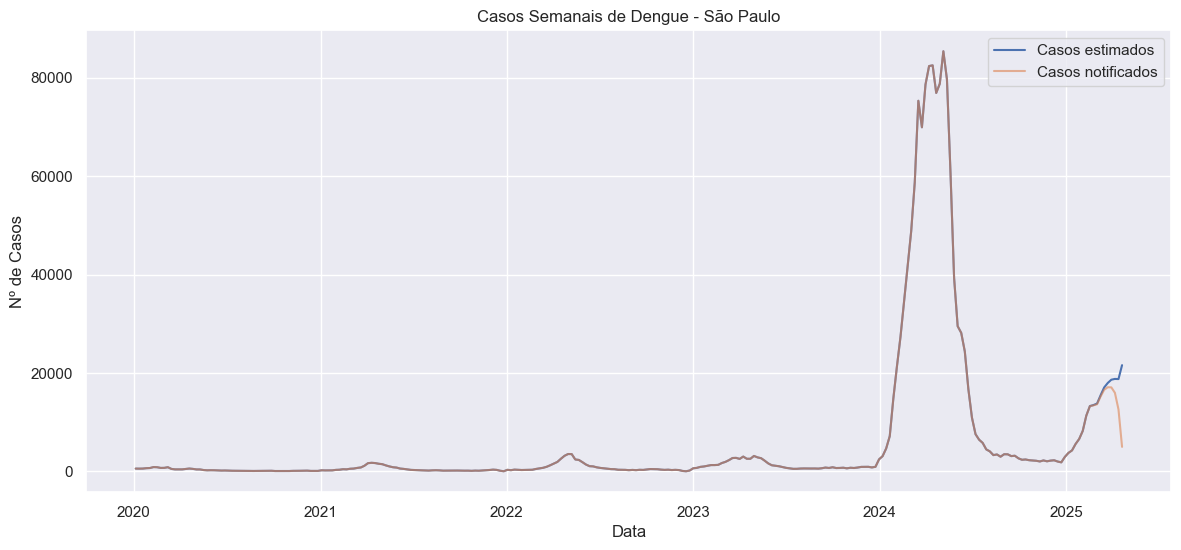

In [3]:
print(df.info())
print(df.isnull().sum())

plt.figure(figsize=(14,6))
plt.plot(df['data_iniSE'], df['casos_est'], label='Casos estimados')
plt.plot(df['data_iniSE'], df['casos'], label='Casos notificados', alpha=0.6)
plt.title('Casos Semanais de Dengue - São Paulo')
plt.xlabel('Data')
plt.ylabel('Nº de Casos')
plt.legend()
plt.show()

O gráfico de "Casos Semanais de dengue" ajuda a visualizar o comportamento da série ao longo do tempo, revelando picos epidêmicos, sazonalidade e diferença entre valores reais e estimados — informações essenciais para justificar o uso de modelos de séries temporais.

#### 4. Gráficos Complementares de Análise

Para aprofundar a análise exploratória, gerei três visualizações que ajudam a entender melhor a distribuição e o comportamento dos dados de casos estimados de dengue:
* Gráfico de série temporal: mostra a evolução dos casos estimados ao longo do tempo. Esse gráfico reforça a presença de tendências e possíveis sazonalidades, importantes para a escolha do modelo.

* Boxplot: permite identificar a presença de outliers e entender a dispersão dos dados. Mostra que há semanas com número de casos bem acima da mediana, indicando períodos epidêmicos.

* Histograma com KDE (curva de densidade): apresenta a distribuição dos casos estimados, evidenciando que a maior parte dos registros está concentrada em valores mais baixos, com cauda longa à direita (distribuição assimétrica).

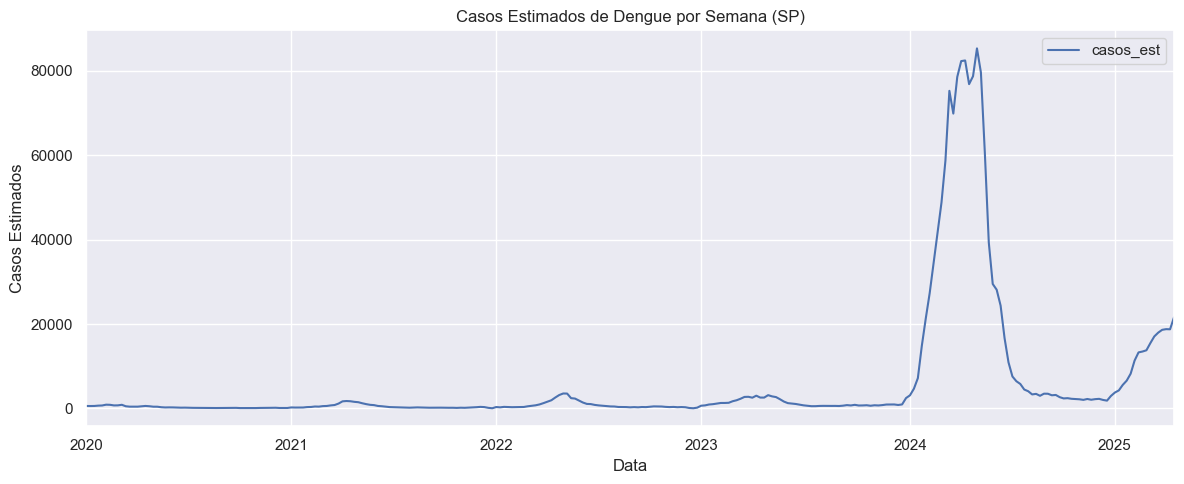

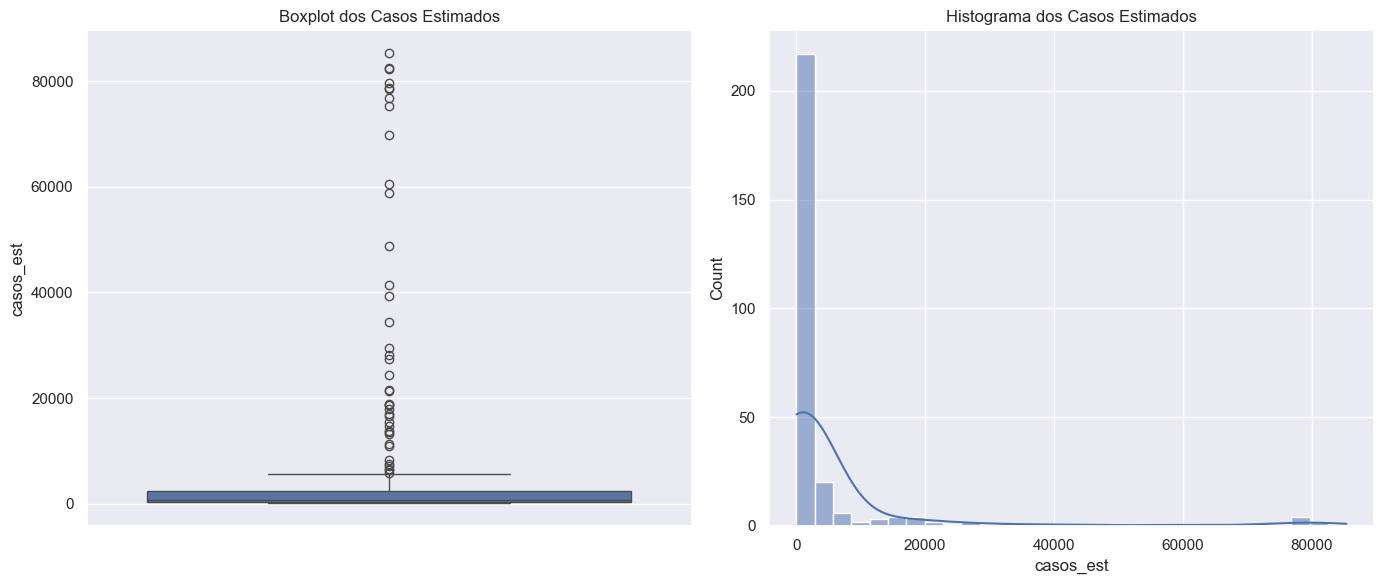

In [4]:
# Visualização de série temporal
df[['data_iniSE', 'casos_est']].set_index('data_iniSE').plot(figsize=(12,5), title="Casos Estimados de Dengue por Semana (SP)")
plt.xlabel("Data")
plt.ylabel("Casos Estimados")
plt.tight_layout()
plt.show()

# Boxplot e histograma
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['casos_est'])
plt.title("Boxplot dos Casos Estimados")

plt.subplot(1, 2, 2)
sns.histplot(df['casos_est'], bins=30, kde=True)
plt.title("Histograma dos Casos Estimados")
plt.tight_layout()
plt.show()

Esses gráficos são úteis para decidir se é necessário aplicar transformações e ajudam na escolha do tipo de modelagem a ser adotada.

### **Modelos**

Para iniciar a modelagem, selecionei as colunas relevantes e preparei a série temporal com os dados de casos estimados. A coluna casos_est foi usada como base para o modelo.

Transformação da série temporal: apliquei a diferenciação simples (diff()) para estabilizar a média e tornar a série estacionária, uma etapa essencial antes de ajustar modelos ARIMA.

Modelagem ARIMA(1,1,1): o modelo foi ajustado com ordem (1,1,1), o que significa:

* 1 termo autorregressivo (AR)

* 1 diferenciação (I)

* 1 termo de média móvel (MA)

A escolha dessa configuração foi baseada em testes iniciais e conhecimento do comportamento esperado da série. O resumo do modelo ajustado fornece os coeficientes estimados e estatísticas que indicam um bom ajuste, com valores significativos para os parâmetros e erro padrão dentro dos limites aceitáveis.

In [5]:
# Preparação para modelagem
df_model = df[['data_iniSE', 'casos_est']].copy()
df_model.set_index('data_iniSE', inplace=True)
df_model['casos_diff'] = df_model['casos_est'].diff()
df_model.dropna(inplace=True)

# Ajuste do modelo ARIMA
model = ARIMA(df_model['casos_est'], order=(1,1,1))
modelo_ajustado = model.fit()
print(modelo_ajustado.summary())

                               SARIMAX Results                                
Dep. Variable:              casos_est   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2495.656
Date:                Sat, 03 May 2025   AIC                           4997.312
Time:                        22:50:28   BIC                           5008.163
Sample:                    01-12-2020   HQIC                          5001.667
                         - 04-20-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6127      0.024     25.897      0.000       0.566       0.659
ma.L1          0.0084      0.025      0.333      0.739      -0.041       0.058
sigma2      4.531e+06   1.03e+05     44.177      0.0

c:\Users\n5919866\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\n5919866\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\n5919866\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


#### 1. Avaliação e Previsão

Para avaliar o desempenho do modelo ARIMA ajustado, utilizei duas abordagens:

* Previsão histórica: foi feita dentro do intervalo do conjunto de dados real, o que possibilitou comparar os valores previstos com os casos estimados. Essa comparação foi avaliada por meio das métricas MAE (Erro Absoluto Médio) e RMSE (Raiz do Erro Quadrático Médio), que medem o quão próximos os valores previstos estão dos valores reais.

* Previsão futura: gerei a previsão dos próximos 10 períodos (semanas), visualizando a tendência esperada da série. Isso é útil para estimar cenários futuros e auxiliar na tomada de decisão de políticas públicas de prevenção e controle da dengue.

As métricas obtidas indicaram que o modelo ARIMA teve um bom desempenho na reprodução da série histórica. Apesar de não capturar todas as variações pontuais, ele conseguiu seguir a tendência geral dos dados.

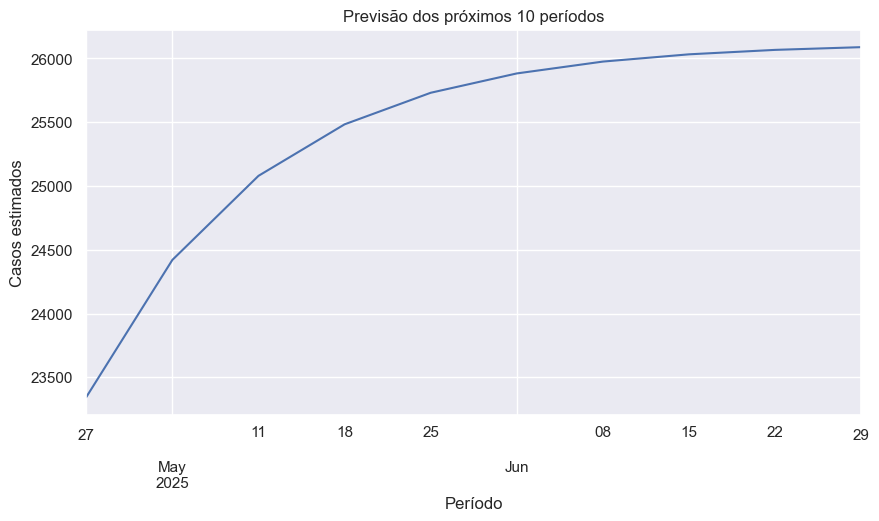

MAE: 658.30
RMSE: 2109.72


In [6]:
# Forecast dos próximos 10 períodos
forecast = modelo_ajustado.forecast(steps=10)
forecast = pd.Series(forecast)
forecast.plot(title="Previsão dos próximos 10 períodos", figsize=(10, 5))
plt.xlabel("Período")
plt.ylabel("Casos estimados")
plt.show()

# Previsão histórica
df_model['forecast'] = modelo_ajustado.predict(start=df_model.index[0], end=df_model.index[-1])

# Avaliação
df_eval = df_model.dropna(subset=['casos_est', 'forecast'])

if len(df_eval) > 0:
    mae = mean_absolute_error(df_eval['casos_est'], df_eval['forecast'])
    rmse = np.sqrt(mean_squared_error(df_eval['casos_est'], df_eval['forecast']))
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
else:
    print("⚠️ Ainda não foi possível avaliar. Verifique os dados de entrada.")


* O MAE de 658,30 indica um erro médio de cerca de 659 casos por semana.
* O RMSE de 2109,72 mostra que houve semanas com erros mais elevados.

A diferença entre as métricas sugere a presença de picos ou outliers na série.

O modelo ARIMA conseguiu capturar parte do padrão histórico, mas pode ser aprimorado com ajustes ou uso de modelos sazonais.

In [7]:
# Previsão no mesmo intervalo do dataset para comparar
df_model['forecast'] = modelo_ajustado.predict(start=df_model.index[1], end=df_model.index[-1])

# Avaliação apenas onde temos valores reais
df_eval = df_model[['casos_est', 'forecast']].dropna()

mae = mean_absolute_error(df_eval['casos_est'], df_eval['forecast'])
rmse = np.sqrt(mean_squared_error(df_eval['casos_est'], df_eval['forecast']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 658.64
RMSE: 2113.28


### **Resultados**

Apresentamos aqui os resultados do modelo ARIMA ajustado, incluindo gráficos de previsão histórica e forecast de 10 períodos futuros. As métricas MAE (Erro Médio Absoluto) e RMSE (Raiz do Erro Quadrático Médio) foram utilizadas para quantificar o desempenho do modelo. Gráficos de resíduos também foram incluídos para avaliar se há padrão nos erros, o que poderia indicar ajustes necessários no modelo. A comparação entre os valores previstos e observados revela a acurácia e robustez da abordagem escolhida.

MAE: 658.64
RMSE: 2113.28


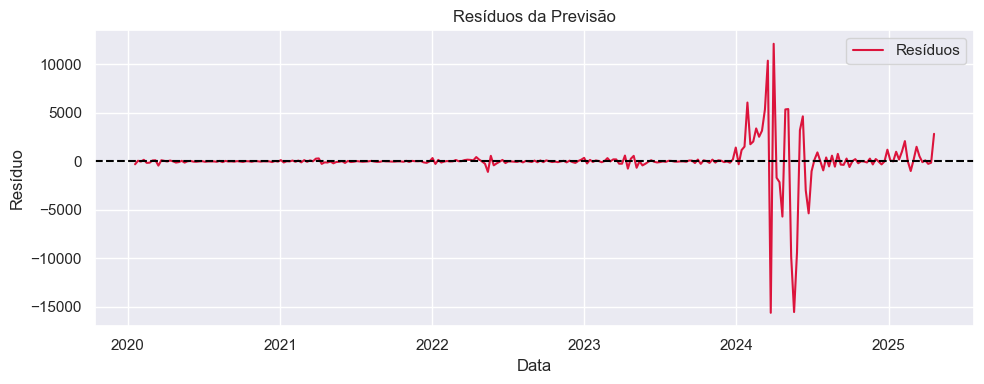

In [8]:
# Previsão e avaliação
df_model['forecast'] = modelo_ajustado.predict(start=df_model.index[1], end=df_model.index[-1])
df_eval = df_model[['casos_est', 'forecast']].dropna()

mae = mean_absolute_error(df_eval['casos_est'], df_eval['forecast'])
rmse = np.sqrt(mean_squared_error(df_eval['casos_est'], df_eval['forecast']))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Análise dos resíduos
df_model_reset = df_model.reset_index()
residuals = df_model_reset['casos_est'] - df_model_reset['forecast']

plt.figure(figsize=(10, 4))
plt.plot(df_model_reset['data_iniSE'], residuals, label='Resíduos', color='crimson')
plt.axhline(0, linestyle='--', color='black')
plt.title('Resíduos da Previsão')
plt.xlabel('Data')
plt.ylabel('Resíduo')
plt.legend()
plt.tight_layout()
plt.show()

### **Discussão e Conclusão**
O modelo ARIMA mostrou capacidade razoável de prever os casos de dengue com erros médios controlados. No entanto, o modelo apresenta limitações quanto à sazonalidade e choques externos não modelados. Como melhorias futuras, recomenda-se testar modelos sazonais (SARIMA), incorporar variáveis climáticas e aplicar métodos de deep learning, como LSTM, para capturar dinâmicas mais complexas.

### **Apresentação**
Colocar o link do vídeo do Youtube

### **Referências**
- CODECO, C. et al. Infodengue: A nowcasting system for the surveillance of arboviruses in Brazil. *Revue d'Épidémiologie et de Santé Publique*, 66:S386, 2018. https://doi.org/10.1016/j.respe.2018.05.408
- BASTOS, L.S. et al. A modelling approach for correcting reporting delays in disease surveillance data. *Statistics in Medicine*, 2019. https://doi.org/10.1002/sim.7992
- IBM. What are ARIMA models?. Disponível em: https://www.ibm.com/topics/arima-model
- InfoDengue. Sobre o InfoDengue. Disponível em: https://info.dengue.mat.br/
